# Préparation des images

In [30]:
IMAGE_SIZE = (64,64)
MAX_IMAGES = 10000
NB_CLUSTERS = 10

In [23]:
from PIL import Image, ImageOps
import os
import numpy as np
import pandas as pd
import random

 #! it make everything crash for some reason xD
def augment_image(img):
    res = []
    res.append(img)
    # Miroir vertical
    transformed = ImageOps.flip(img)
    res.append(transformed)
    # Rotation de 180°
    transformed = img.rotate(180)
    res.append(transformed)

    return res

def load_images_into_array(folder_path, max_images=100, image_size=(64, 64)):
    images = []
    i = 0
    for filename in os.listdir(folder_path):
        if(i >= max_images):
            break

        file_path = os.path.join(folder_path, filename)
        
        try:
            # Charger l'image et la redimensionner
            img = Image.open(file_path).convert('RGB')
            img = img.resize(image_size)
            # normaliser les valeurs de pixels de 0 à 1 au lieu de 0 à 255
            img = np.array(img).astype('float32') / 255
            img_array = np.array(img)
            # Ajouter l'image à la liste
            images.append(img_array.flatten())
        except Exception as e:
            print(f"Erreur lors du traitement de l'image {file_path}: {str(e)}")
            print(e)
        
        i += 1

    return images

# Spécifiez le chemin du dossier contenant vos images
dataset_folder_path = "./fruits/"

# Chargez les images dans un format adapté à scikit-learn
images = load_images_into_array(dataset_folder_path,max_images=MAX_IMAGES,image_size=IMAGE_SIZE)

# Créez un DataFrame pandas avec les données
df = pd.DataFrame(data=images)

# Affichez les premières lignes du DataFrame
print(df.head())

      0         1         2         3         4         5         6      \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.968627  0.980392  0.976471  0.964706  0.976471  0.972549  0.984314   
2  0.933333  0.933333  0.933333  0.972549  0.972549  0.972549  0.996078   
3  1.000000  0.992157  0.988235  0.984314  0.972549  0.964706  0.937255   
4  0.309804  0.337255  0.156863  0.341176  0.376471  0.200000  0.349020   

      7         8         9      ...     12278     12279     12280     12281  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  0.996078  0.992157  0.984314  ...  0.121569  0.427451  0.298039  0.192157   
2  0.996078  0.996078  0.945098  ...  0.945098  0.992157  0.992157  0.992157   
3  0.921569  0.901961  0.945098  ...  0.972549  1.000000  0.992157  0.968627   
4  0.384314  0.219608  0.443137  ...  0.219608  0.521569  0.356863  0.274510   

      12282     12283     12284     12285     12286     12287  
0  1

In [24]:
# Augmentation du jeu de données (make everything very slow)


# 5. Application de K-Means

In [31]:
# Appliquez l’algorithme K-Means sur les images prétraitées et augmentées
# pour regrouper les fruits en clusters. Choisissez un nombre de clusters K
# approprié. Vous pouvez expérimenter avec différentes valeurs de K

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Créez un objet K-Means avec 5 clusters
kmeans = KMeans(n_clusters=NB_CLUSTERS, random_state=0)

kmeans.fit(df)

c:\Users\hrey2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=0)

In [32]:
from matplotlib import pyplot as plt

preds = kmeans.predict(df)



Cluster 0


C:\Users\hrey2\AppData\Local\Temp\ipykernel_6912\3167997169.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
Cluster 8
Cluster 9


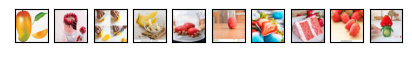

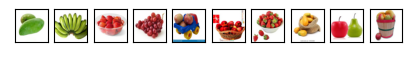

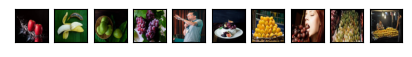

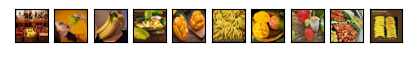

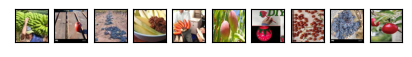

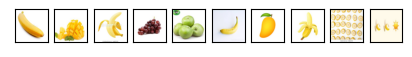

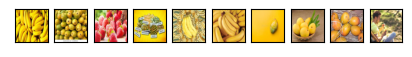

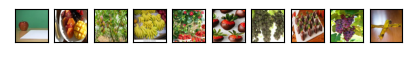

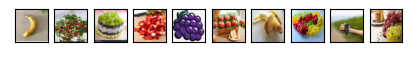

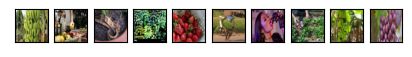

In [33]:
columns = 10
rows = NB_CLUSTERS
for i in range(0,rows):
    print("Cluster " + str(i))
    fig = plt.figure(figsize=(5, 20))
    errors =0
    for j in range(0, columns):
        try:
            img = df.iloc[kmeans.labels_ == i].values[j]
            img = img.reshape((IMAGE_SIZE[0],IMAGE_SIZE[1],3))
            img = Image.fromarray((img * 255).astype(np.uint8))
            fig.add_subplot(rows, columns, (i*columns)+j+1, xticks=[], yticks=[])
            plt.imshow(img)
        except:
            print("no more image in cluster " + str(i))
            errors += 1
    if(errors < 3):
        fig.show()
